In [3]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn import  metrics
from statsmodels.formula.api import ols

# Zadanie
Proszę pobrać dane z 

https://archive.ics.uci.edu/ml/datasets/automobile

https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
names = ['symboling','normalized-losses','make','fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [5]:
data = pd.read_csv(url, names=names, delimiter=",", na_values=["?"])
print(data.shape)

(205, 26)


In [6]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Zadanie
Proszę usunąć kolumny, które nie są numeyczne.

In [7]:
drop_list = ['symboling','make','make','fuel-type', 'aspiration', 'num-of-doors', 
             'body-style', 'drive-wheels', 'engine-location','engine-type','num-of-cylinders','fuel-system']

In [8]:
data=data.drop(drop_list, axis=1)
data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Zadanie
Prosze usunąć brakujące dane.

In [9]:
null_counts = data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [10]:
data=data.dropna()
data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


In [11]:
data.columns  = [i.replace("-","_") for i in data.columns.values  ]

In [12]:
data.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


In [14]:
import seaborn as sns

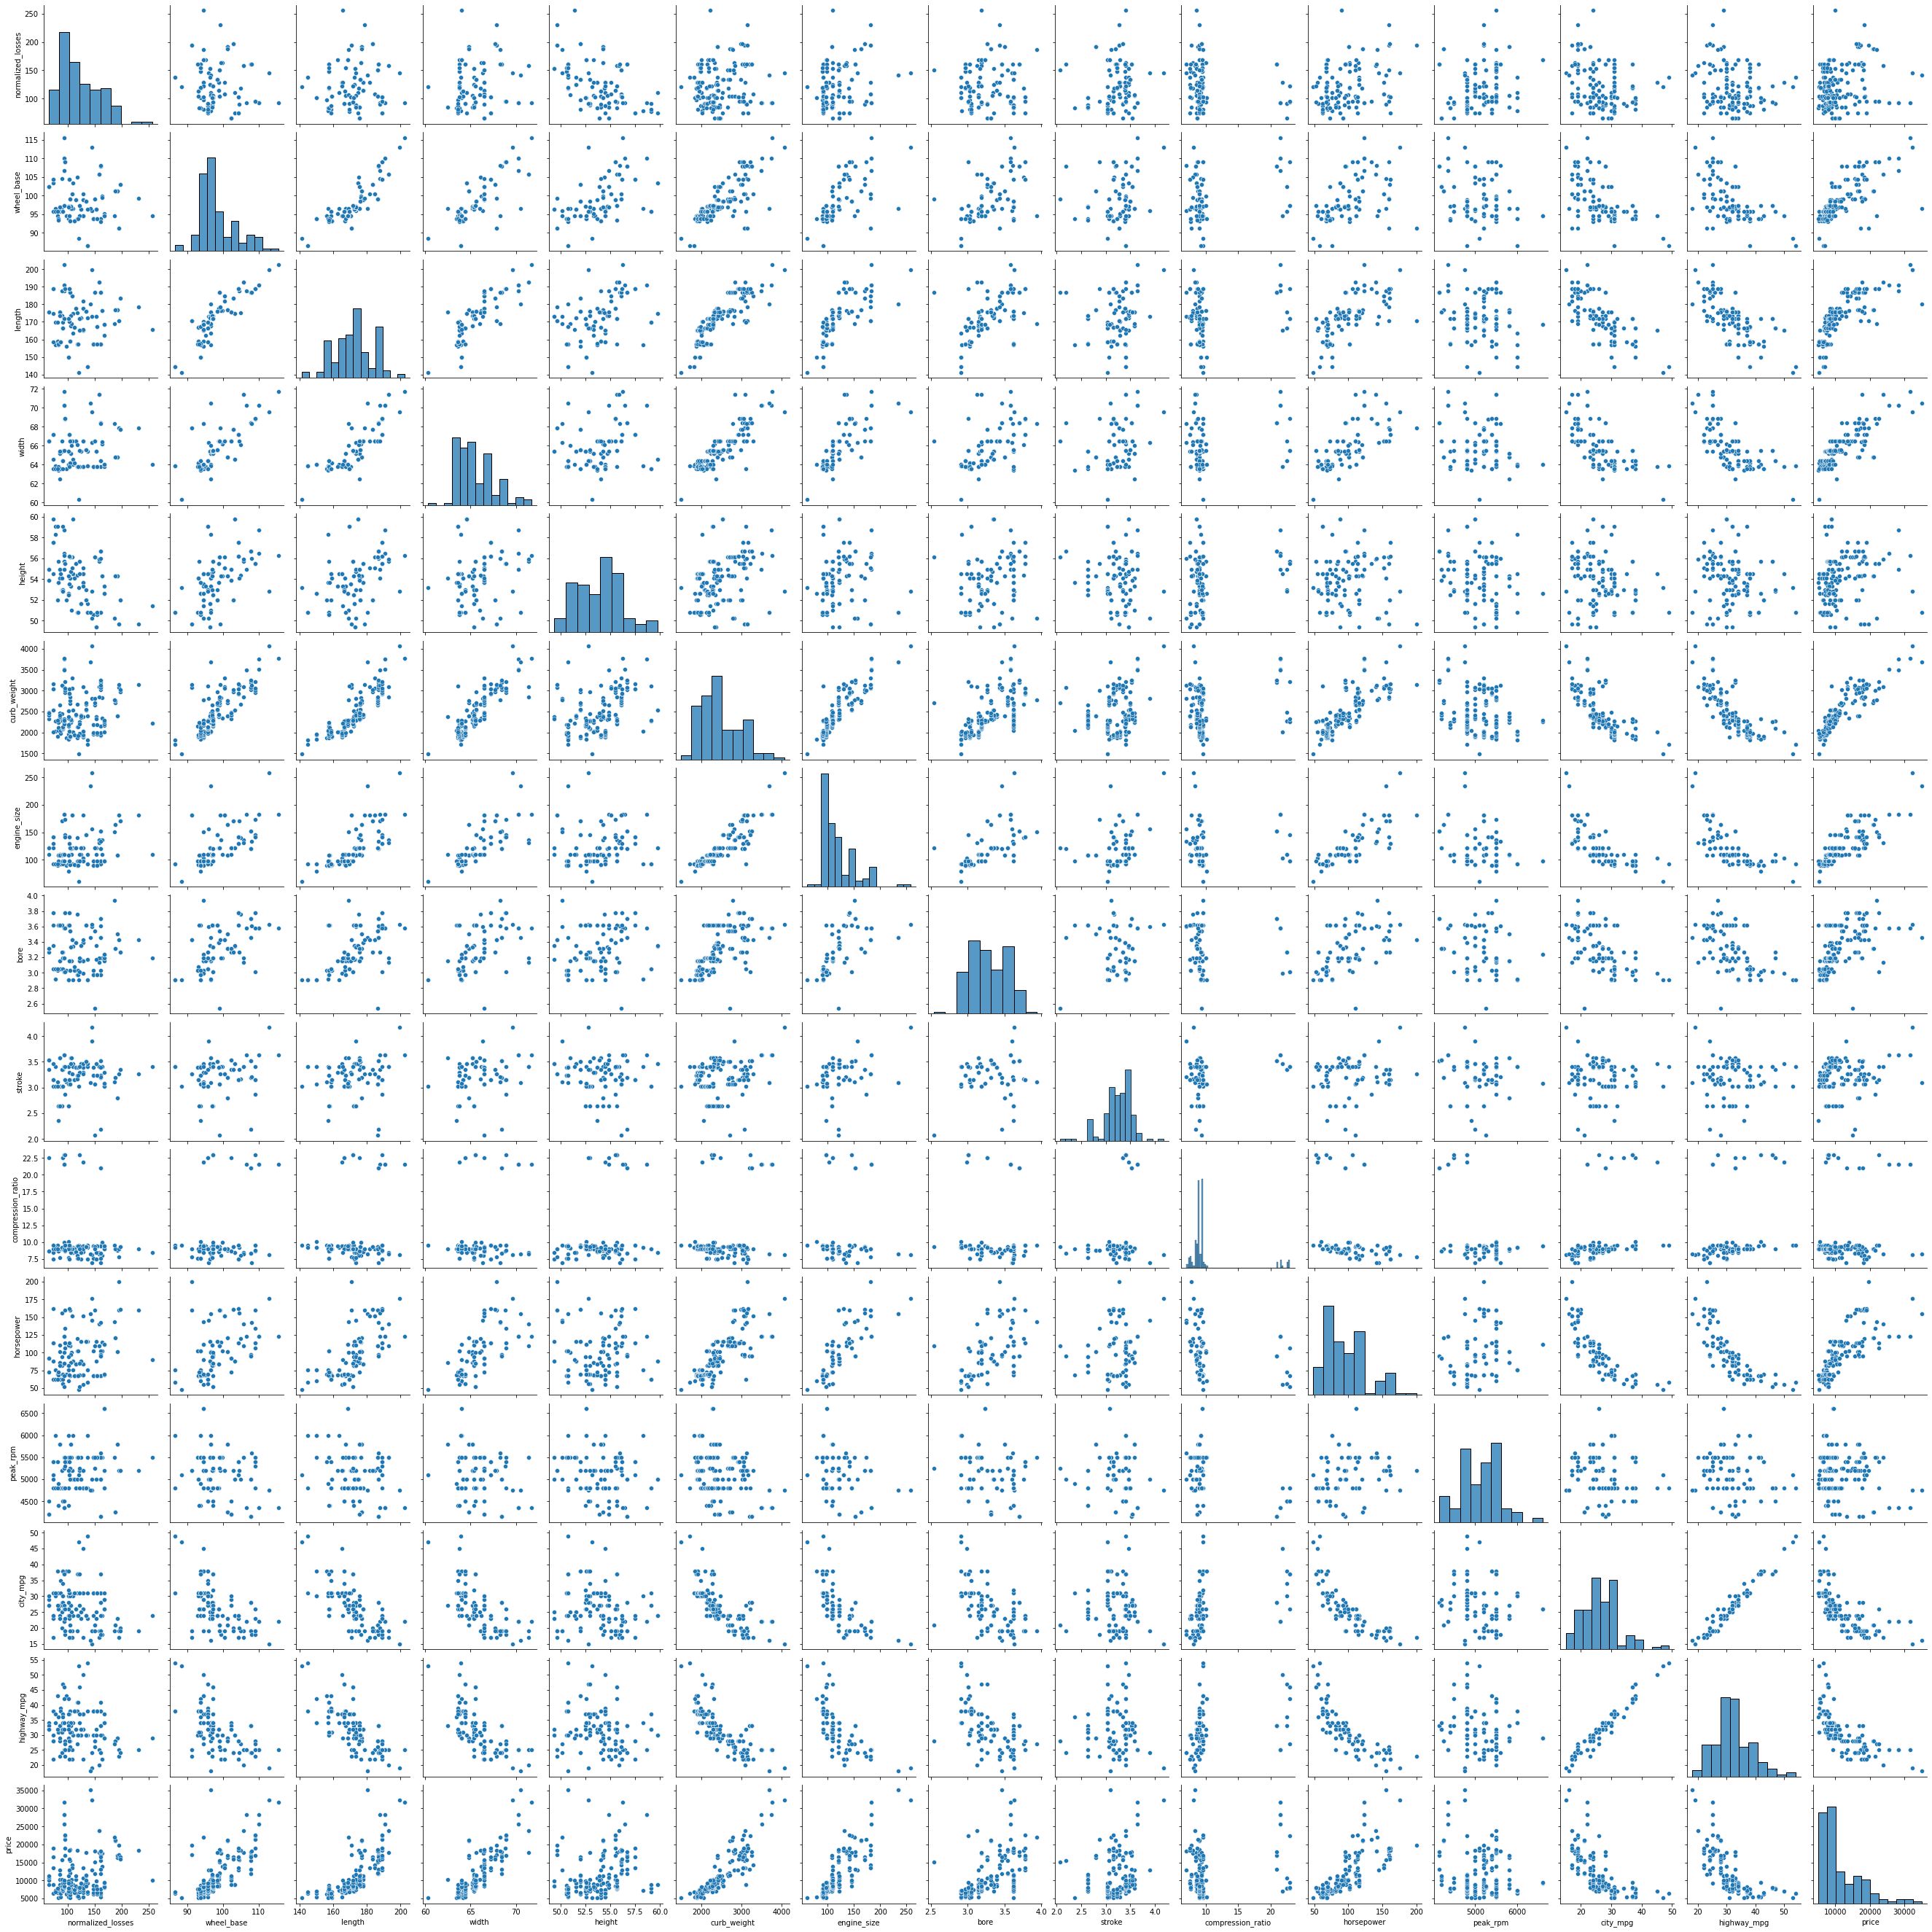

In [27]:
sns.pairplot(data)

In [13]:
model = ols("price ~ length + compression_ratio:peak_rpm", data).fit()
# Print the summary
print((model.summary2()))

                            Results: Ordinary least squares
Model:                     OLS                     Adj. R-squared:            0.577     
Dependent Variable:        price                   AIC:                       3095.6876 
Date:                      2022-04-06 11:11        BIC:                       3104.9131 
No. Observations:          160                     Log-Likelihood:            -1544.8   
Df Model:                  2                       F-statistic:               109.7     
Df Residuals:              157                     Prob (F-statistic):        1.58e-30  
R-squared:                 0.583                   Scale:                     1.4528e+07
----------------------------------------------------------------------------------------
                              Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------------------
Intercept                  -55602.4897 4536.3835 -

In [43]:
model = ols("price ~ length:height:width + horsepower + bore", data).fit()
# Print the summary
print((model.summary2()))

                        Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.713     
Dependent Variable:      price                AIC:                    3034.9723 
Date:                    2022-04-06 12:29     BIC:                    3047.2730 
No. Observations:        160                  Log-Likelihood:         -1513.5   
Df Model:                3                    F-statistic:            132.4     
Df Residuals:            156                  Prob (F-statistic):     1.10e-42  
R-squared:               0.718                Scale:                  9.8799e+06
--------------------------------------------------------------------------------
                       Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
--------------------------------------------------------------------------------
Intercept           -18580.5131 3361.5955 -5.5273 0.0000 -25220.6307 -11940.3956
length:height:width      0.0374    0.0045  8.2952 0.0

In [51]:
model = ols("price ~ length:width + horsepower:wheel_base + np.log(bore):curb_weight", data).fit()
# Print the summary
print((model.summary2()))

                          Results: Ordinary least squares
Model:                     OLS                   Adj. R-squared:          0.778     
Dependent Variable:        price                 AIC:                     2993.8394 
Date:                      2022-04-06 12:31      BIC:                     3006.1401 
No. Observations:          160                   Log-Likelihood:          -1492.9   
Df Model:                  3                     F-statistic:             186.5     
Df Residuals:              156                   Prob (F-statistic):      2.23e-51  
R-squared:                 0.782                 Scale:                   7.6402e+06
------------------------------------------------------------------------------------
                            Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
------------------------------------------------------------------------------------
Intercept                -16413.5566 3603.6719 -4.5547 0.0000 -23531.8447 -9295.2686
length: